# 2.Improving Deep Neural Networks:Hyperparameter Tuning,Regularization and Optimization

## 2.5TensorFlow

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches,convert_to_one_hot, predict
#matplotlib inline
np.random.seed(1)

G:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
y_hat = tf.constant(36,name='y_hat')
y = tf.constant(39,name='y')
loss = tf.Variable((y-y_hat)**2,name='loss')
init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print(session.run(loss))

9


In [5]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [6]:
sess = tf.Session()
print(sess.run(c))

20


In [7]:
x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


In [8]:
def linear_function():
    np.random.seed(1)
    ### START CODE HERE ### (4 lines of code)
    X = tf.constant(np.random.randn(3,1), name = "X")
    W = tf.constant(np.random.randn(4,3), name = "W")
    b = tf.constant(np.random.randn(4,1), name = "b")
    Y = tf.add(tf.matmul(W,X),b)
    ### END CODE HERE ###
    # Create the session using tf.Session() and run it with sess.run(...) on the variable you want to calculate
    ### START CODE HERE ###
    sess = tf.Session()
    result = sess.run(Y)
    ### END CODE HERE ###
    # close the session
    sess.close()
    return result

In [9]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [10]:
def sigmoid(z):
    ### START CODE HERE ### ( approx. 4 lines of code)
    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32, name = "x")
    # compute sigmoid(x)
    sigmoid =tf.sigmoid(x)
    # Create a session, and run it. Please use the method 2 explained above.
    # You should use a feed_dict to pass z's value to x.
    with tf.Session() as sess:
    # Run session and call the output "result"
        result = sess.run(sigmoid, feed_dict = {x: z})
    return result

In [11]:
def cost(logits, labels):
    z = tf.placeholder(tf.float32, name = "z")
    y = tf.placeholder(tf.float32, name = "y")
    # Use the loss function (approx. 1 line)
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z, labels= y)
    # Create a session (approx. 1 line). See method 1 above.
    sess = tf.Session()
    # Run the session (approx. 1 line).
    cost = sess.run(cost, feed_dict={z: logits, y: labels})
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    ### END CODE HERE ###
    return cost

In [12]:
def one_hot_matrix(labels, C):
    ### START CODE HERE ###
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C, name="C")
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(labels, C, axis=0)
    
    # Create the session (approx. 1 line)
    sess = tf.Session()
    
    # Run the session (approx. 1 line)
    one_hot = sess.run(one_hot_matrix)
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    ### END CODE HERE ###
    return one_hot

In [13]:
def ones(shape):
    ### START CODE HERE ###
    # Create "ones" tensor using tf.ones(...). (approx. 1 line)
    ones = tf.ones(shape)
    # Create the session (approx. 1 line)
    sess = tf.Session()
    # Run the session to compute 'ones' (approx. 1 line)
    ones = sess.run(ones)
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    ### END CODE HERE ###
    return ones

In [14]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes =load_dataset()

y = 5


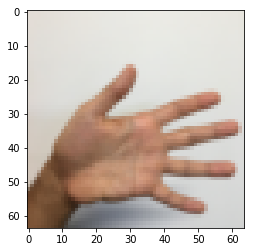

In [15]:
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [16]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [17]:
def create_placeholders(n_x, n_y):
    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32, [n_x, None], name = 'X')
    Y = tf.placeholder(tf.float32, [n_y, None], name = 'Y')
    ### END CODE HERE ###
    return X, Y

In [18]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_2:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_2:0", shape=(6, ?), dtype=float32)


In [19]:
W1 = tf.get_variable("W1", [25,12288], initializer =\
tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer =\
tf.zeros_initializer())


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [20]:
def initialize_parameters():
    tf.set_random_seed(1) # so that your "random" numbers match ours
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [25,12288], initializer =tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    return parameters

In [21]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [22]:
def forward_propagation(X, parameters):
    # Retrieve the parameters from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines) # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1) # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1) # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2) # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2) # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3) # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

In [23]:
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [24]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    return cost

In [25]:
tf.reset_default_graph()
with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [26]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,\
num_epochs = 1500, minibatch_size = 32, print_cost = True):
    ops.reset_default_graph() # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1) # to keep consistent results
    seed = 3 # to keep consistent results
    (n_x, m) = X_train.shape # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0] # n_y : output size
    costs = [] # To keep track of the cost
    
    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        # Run the initialization
        sess.run(init)
        # Do the training loop
        for epoch in range(num_epochs):
            epoch_cost = 0. # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = sess.run([optimizer, cost],feed_dict={X: minibatch_X, Y: minibatch_Y})
                epoch_cost += minibatch_cost / num_minibatches
            
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.017255
Cost after epoch 200: 0.733184
Cost after epoch 300: 0.573071
Cost after epoch 400: 0.468573
Cost after epoch 500: 0.381228
Cost after epoch 600: 0.313815
Cost after epoch 700: 0.253708
Cost after epoch 800: 0.203900
Cost after epoch 900: 0.166454
Cost after epoch 1000: 0.146636
Cost after epoch 1100: 0.107279
Cost after epoch 1200: 0.086698
Cost after epoch 1300: 0.059342
Cost after epoch 1400: 0.052289


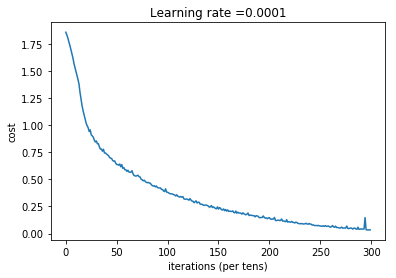

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [27]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [28]:
import scipy
from PIL import Image
from scipy import ndimage

In [ ]:
my_image = "thumbs_up.jpg"